# 302 Group Project - Covid Vaccines Analysis

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import dataset (merged aefi.csv and vax_malaysia.csv)

In [57]:
df1 = pd.read_csv('Latest_covid_datasets.csv')

In [58]:
df1.head()

,Unnamed: 0,vaxtype,daily_total,daily_nonserious_mysj_dose1,daily_nonserious_mysj_dose2,d1_site_swelling,d1_site_redness,d1_tiredness,d1_headache,d1_muscle_pain,...,d2_fever,d2_vomiting,d2_chills,d2_rash,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2
0,105,astrazeneca,139,139,0,7,2,73,62,40,...,0,0,0,0,22192,19742,5339,3175,4619,0
1,106,pfizer,3901,2017,1787,450,127,974,759,569,...,216,228,199,80,22192,19742,5339,3175,4619,0
2,107,sinovac,424,256,160,12,6,129,101,46,...,18,24,15,9,22192,19742,5339,3175,4619,0
3,108,astrazeneca,95,94,0,7,2,71,37,26,...,0,0,0,0,26292,13812,7222,4980,3595,0
4,109,pfizer,2311,1186,1012,256,72,586,434,359,...,183,135,170,42,26292,13812,7222,4980,3595,0


In [59]:
df1.columns

Index(['Unnamed: 0', 'vaxtype', 'daily_total', 'daily_nonserious_mysj_dose1',
       'daily_nonserious_mysj_dose2', 'd1_site_swelling', 'd1_site_redness',
       'd1_tiredness', 'd1_headache', 'd1_muscle_pain', 'd1_joint_pain',
       'd1_weakness', 'd1_fever', 'd1_vomiting', 'd1_chills', 'd1_rash',
       'd2_site_swelling', 'd2_site_redness', 'd2_tiredness', 'd2_headache',
       'd2_muscle_pain', 'd2_joint_pain', 'd2_weakness', 'd2_fever',
       'd2_vomiting', 'd2_chills', 'd2_rash', 'pfizer1', 'pfizer2', 'sinovac1',
       'sinovac2', 'astra1', 'astra2'],
      dtype='object')

Create Dataframe containing Summation by columns and group by vaxtype

In [60]:
df1_sum = df1.groupby('vaxtype')[['daily_total', 'daily_nonserious_mysj_dose1',
       'daily_nonserious_mysj_dose2', 'd1_site_swelling', 'd1_site_redness',
       'd1_tiredness', 'd1_headache', 'd1_muscle_pain', 'd1_joint_pain',
       'd1_weakness', 'd1_fever', 'd1_vomiting', 'd1_chills', 'd1_rash',
       'd2_site_swelling', 'd2_site_redness', 'd2_tiredness', 'd2_headache',
       'd2_muscle_pain', 'd2_joint_pain', 'd2_weakness', 'd2_fever',
       'd2_vomiting', 'd2_chills', 'd2_rash','pfizer1', 'pfizer2', 'sinovac1',
       'sinovac2', 'astra1', 'astra2']].sum()

Cleaning Data that was merged from vax_malaysia by reorganising into columns for dose 1, dose 2 and dropping columns 'pfizer1', 'pfizer2', 'sinovac1','sinovac2', 'astra1', 'astra2'.

Add new column consisting of total doses for each vaccine given.

In [61]:
#Total dose 1
Total_D1_admin = [df1_sum.loc['astrazeneca', 'astra1'], df1_sum.loc['pfizer', 'pfizer1'], df1_sum.loc['sinovac', 'sinovac1']]
df1_sum['Total_D1_admin'] = Total_D1_admin

#Total dose 2
Total_D2_admin = [df1_sum.loc['astrazeneca', 'astra2'], df1_sum.loc['pfizer', 'pfizer2'], df1_sum.loc['sinovac', 'sinovac2']]
df1_sum['Total_D2_admin'] = Total_D2_admin

#Total dose for each vax
Total_dose_admin = df1_sum[['Total_D1_admin', 'Total_D2_admin']].sum(axis=1)
df1_sum['Total_dose_admin'] = Total_dose_admin

#drop columns
df1_sum = df1_sum.drop(['pfizer1', 'pfizer2', 'sinovac1','sinovac2', 'astra1', 'astra2'], axis=1)

df1_sum.insert(0, column = "vaxtype", value = df1_sum.index)
df1_sum.to_csv('Summarized_Covid_Vax_SEs.csv')

Function to calculate percentage

In [139]:
# function to calculate percentage
def percent(a, b):
    percentage = (a/b)*100
    return percentage

# Descriptive analysis

## Percentage of SE reported for each vaccine respectively
### Q: Which vax is more likely to present with side effects?
Astrazeneca (~9.5%). In general, side effects are reported significantly more after dose 1 compared to dose 2.

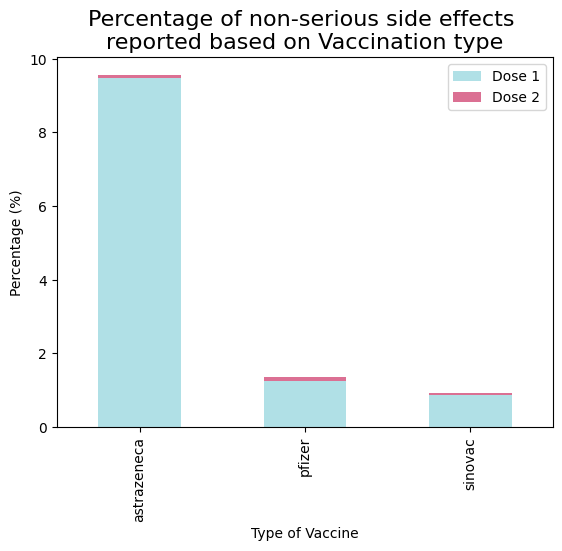

In [145]:
# Percentage of total SE reported for each vaccine (d1,d2 vs vaxtype)
## Q: Which vax is more likely to present with side effects?

## (total SE for each vax/ total dose administered for each vax respectively)
TotalSE_TotalDose = df1_sum[['daily_nonserious_mysj_dose1',
       'daily_nonserious_mysj_dose2']].apply(lambda x: percent(x, df1_sum['Total_dose_admin']))
TotalSE_TotalDose.insert(0, column = "vaxtype", value = TotalSE_TotalDose.index)
TotalSE_TotalDose.to_csv('TotalSE_percentage_byVax.csv')

## bargraph: dose 1 and dose 2 % over Total administered, grouped by vaxtype
TotalSE_TotalDose.plot(kind='bar', stacked=True, color=['powderblue', 'palevioletred'], width=0.5)
plt.xlabel("Type of Vaccine")
plt.ylabel("Percentage (%)")
plt.title("Percentage of non-serious side effects \nreported based on Vaccination type", fontsize=16)
plt.legend(labels = ['Dose 1', 'Dose 2'])

## Percentage of SE reported based on dose 1 or 2
### Q: Is side effects more prevalent after dose 1 or dose 2? Which vaccination has a higher risk of side effects?
SE more prevalent after dose 1. AZ most reported SE after dose 1 but in dose 2, pfizer is slightly more, although the difference is minimal.

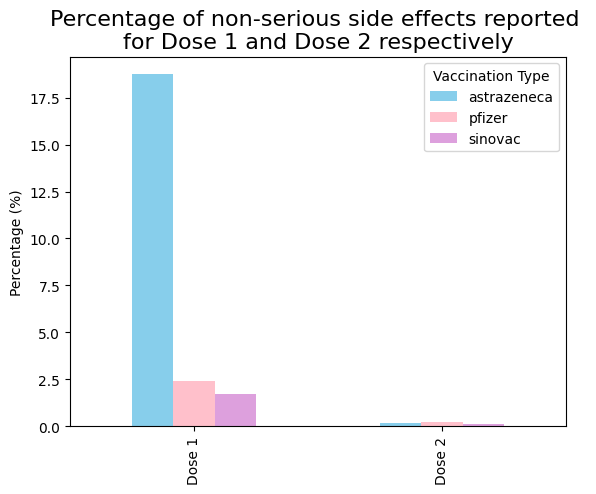

In [149]:

## (total SE1/ total D1 ; total SE2/ total D2)
TotalSEoverDose = pd.DataFrame()

TotalSEoverDose['TotalSE1_D1_pct'] = percent(df1_sum['daily_nonserious_mysj_dose1'], df1_sum['Total_D1_admin'])
TotalSEoverDose['TotalSE2_D2_pct'] = percent(df1_sum['daily_nonserious_mysj_dose2'], df1_sum['Total_D2_admin'])
TotalSEoverDose= TotalSEoverDose.transpose()

Data1 = TotalSEoverDose.rename({'TotalSE1_D1_pct':'Dose 1', 'TotalSE2_D2_pct':'Dose 2'})
Data1.plot(kind='bar', stacked=False, color=['skyblue', 'pink', 'plum'])
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.title("Percentage of non-serious side effects reported \nfor Dose 1 and Dose 2 respectively", fontsize=16)
plt.legend(title='Vaccination Type')



# DOSE 1 Side effects analysis

## Percentage of occurence of SE for each vaccine
### Q: Identify possible association between side effects and vaccinatino type.


In [147]:
# Percentage of occurence of SE for each vaccine
## Q: Identify possible association between side effects and vaccinatino type.

## grouping column names by D1 and D2
d1_cols = ['d1_site_swelling', 'd1_site_redness',
'd1_tiredness', 'd1_headache', 'd1_muscle_pain', 'd1_joint_pain',
'd1_weakness', 'd1_fever', 'd1_vomiting', 'd1_chills', 'd1_rash']

d2_cols = ['d2_site_swelling', 'd2_site_redness', 'd2_tiredness', 'd2_headache',
'd2_muscle_pain', 'd2_joint_pain', 'd2_weakness', 'd2_fever',
'd2_vomiting', 'd2_chills', 'd2_rash']


In [121]:
# dataframe with only dose 1 SE, apply percentage function
D1symp_pct = df1_sum[d1_cols].apply(lambda x: percent(x, df1_sum['daily_nonserious_mysj_dose1']))
D1symp_pct = round(D1symp_pct,2)
D1symp_pct.to_csv('Dose1_symptoms_percentage.csv')

,d1_site_swelling,d1_site_redness,d1_tiredness,d1_headache,d1_muscle_pain,d1_joint_pain,d1_weakness,d1_fever,d1_vomiting,d1_chills,d1_rash
vaxtype,,,,,,,,,,,
astrazeneca,18.79,6.75,64.28,61.18,45.88,33.38,51.00,63.37,13.66,48.81,2.81
pfizer,19.30,4.86,45.05,36.00,24.57,12.73,24.20,13.04,9.08,9.87,2.96
sinovac,5.65,2.79,51.17,43.22,21.96,13.97,26.49,13.54,11.67,11.24,4.65


<Figure size 1400x1400 with 0 Axes>

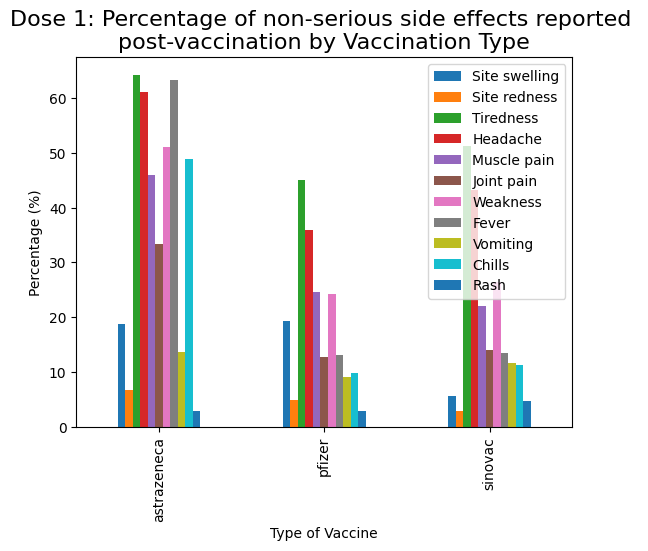

<Figure size 1400x1400 with 0 Axes>

In [123]:
#### bar graph of  D1 SE% group by vaxtype
D1symp_pct.plot(kind='bar')
plt.xlabel("Type of Vaccine")
plt.ylabel("Percentage (%)")
plt.title("Dose 1: Percentage of non-serious side effects reported \n for each vaccine", fontsize=16)
plt.legend(labels = ['Site swelling', 'Site redness', 'Tiredness', 'Headache',
                     'Muscle pain' , 'Joint pain', 'Weakness', 'Fever', 
                     'Vomiting', 'Chills', 'Rash'])
plt.figure(figsize=(14,14))

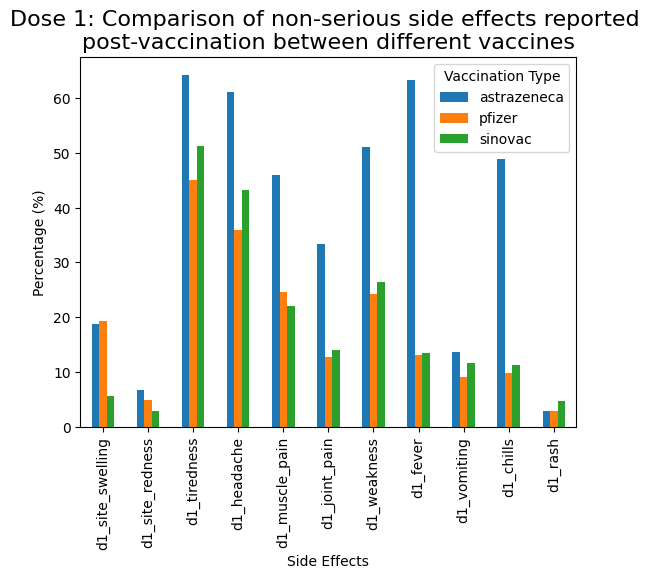

In [124]:
#### bar graph of D1 SE% group by SE
D1symp_pct_bySE = D1symp_pct.transpose()

D1symp_pct_bySE.plot(kind='bar')
plt.xlabel("Side Effects")
plt.ylabel("Percentage (%)")
plt.title("Dose 1: Comparison of non-serious side effects reported \npost-vaccination between different vaccines", fontsize=16)
plt.legend(title = 'Vaccination Type')

# DOSE 2 Side effects analysis

In [125]:
# dataframe with only dose 2 SE, apply percentage function
D2symp_pct = df1_sum[d2_cols].apply(lambda x: percent(x, df1_sum['daily_nonserious_mysj_dose2']))
D2symp_pct = round(D2symp_pct,2)
D2symp_pct.to_csv('Dose2_symptoms_percentage.csv')

,d2_site_swelling,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
vaxtype,,,,,,,,,,,
astrazeneca,12.95,4.79,48.27,43.08,24.28,15.31,28.48,19.83,10.71,16.18,2.40
pfizer,18.91,5.88,46.75,37.67,26.05,14.40,26.71,15.52,11.13,12.45,3.41
sinovac,8.60,4.86,45.75,41.98,21.82,13.55,24.69,10.33,11.90,8.75,4.69


<Figure size 1400x1400 with 0 Axes>

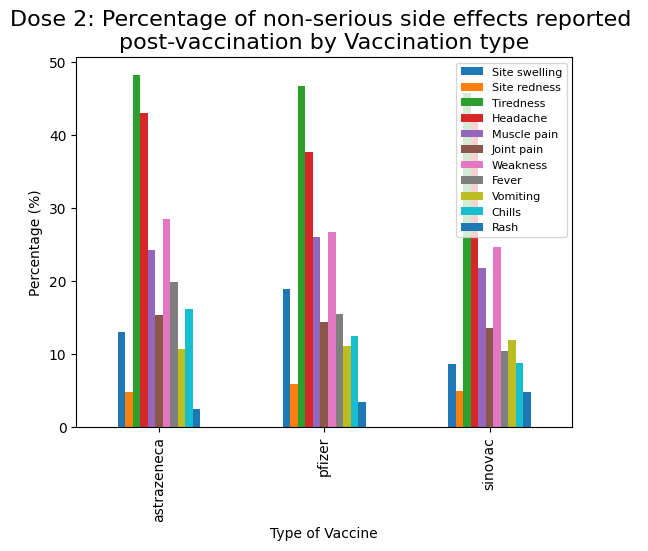

<Figure size 1400x1400 with 0 Axes>

In [126]:
#### bar graph of  D1 SE% group by vaxtype
D2symp_pct.plot(kind='bar')
plt.xlabel("Type of Vaccine")
plt.ylabel("Percentage (%)")
plt.title("Dose 2: Percentage of non-serious side effects reported \npost-vaccination by Vaccination type", fontsize=16)
plt.legend(labels = ['Site swelling', 'Site redness', 'Tiredness', 'Headache',
                     'Muscle pain' , 'Joint pain', 'Weakness', 'Fever', 
                     'Vomiting', 'Chills', 'Rash'], loc='best', fontsize= 8)
plt.figure(figsize=(14,14))

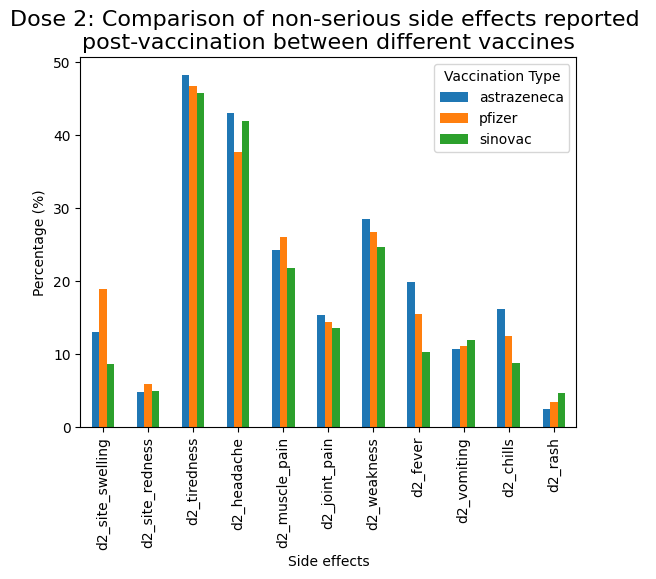

In [128]:
#### bar graph of D1 SE% group by SE
D2symp_pct_bySE = D2symp_pct.transpose()

D2symp_pct_bySE.plot(kind='bar')
plt.xlabel("Side effects")
plt.ylabel("Percentage (%)")
plt.title("Dose 2: Comparison of non-serious side effects reported \npost-vaccination between different vaccines", fontsize=16)
plt.legend(title = 'Vaccination Type')

## Side-by-side comparison of side effects between dose 1 and dose 2.

In [150]:
# create dataframe for dose 1 and dose 2
D1_SE = df1_sum[d1_cols]
D2_SE = df1_sum[d2_cols]

Text(0.5, 0.98, 'Astrazeneca Side Effects')

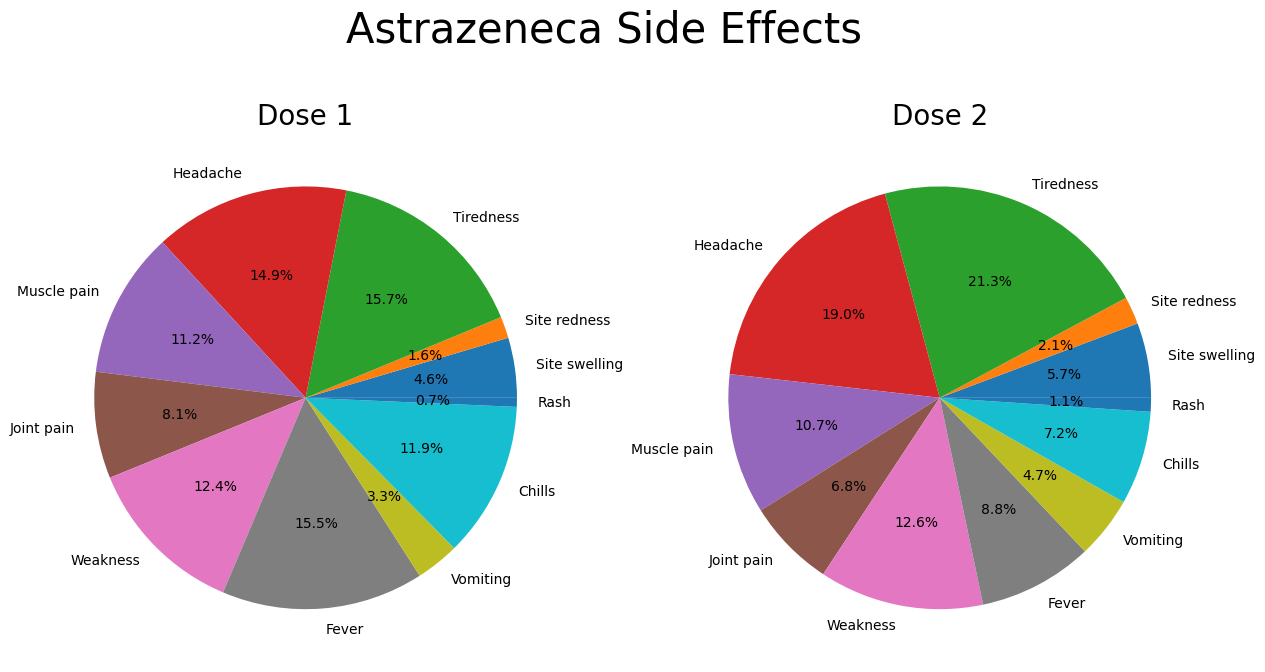

In [151]:
## AZ SE comparison between dose
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8)) #ax1,ax2 refer to your two pies

labels = ['Site swelling', 'Site redness', 'Tiredness', 'Headache',
                     'Muscle pain' , 'Joint pain', 'Weakness', 'Fever', 
                     'Vomiting', 'Chills', 'Rash']
values = D1_SE.loc['astrazeneca']
ax1.pie(values,labels = labels, autopct = '%1.1f%%') #plot first pie
ax1.set_title('Dose 1', fontsize=20)


labels = ['Site swelling', 'Site redness', 'Tiredness', 'Headache',
                     'Muscle pain' , 'Joint pain', 'Weakness', 'Fever', 
                     'Vomiting', 'Chills', 'Rash']
values = D2_SE.loc['astrazeneca']
ax2.pie(values,labels = labels, autopct = '%1.1f%%') #plot first pie
ax2.set_title('Dose 2' , fontsize=20)

fig1.suptitle('Astrazeneca Side Effects', fontsize=30)

Text(0.5, 0.98, 'Pfizer Side Effects')

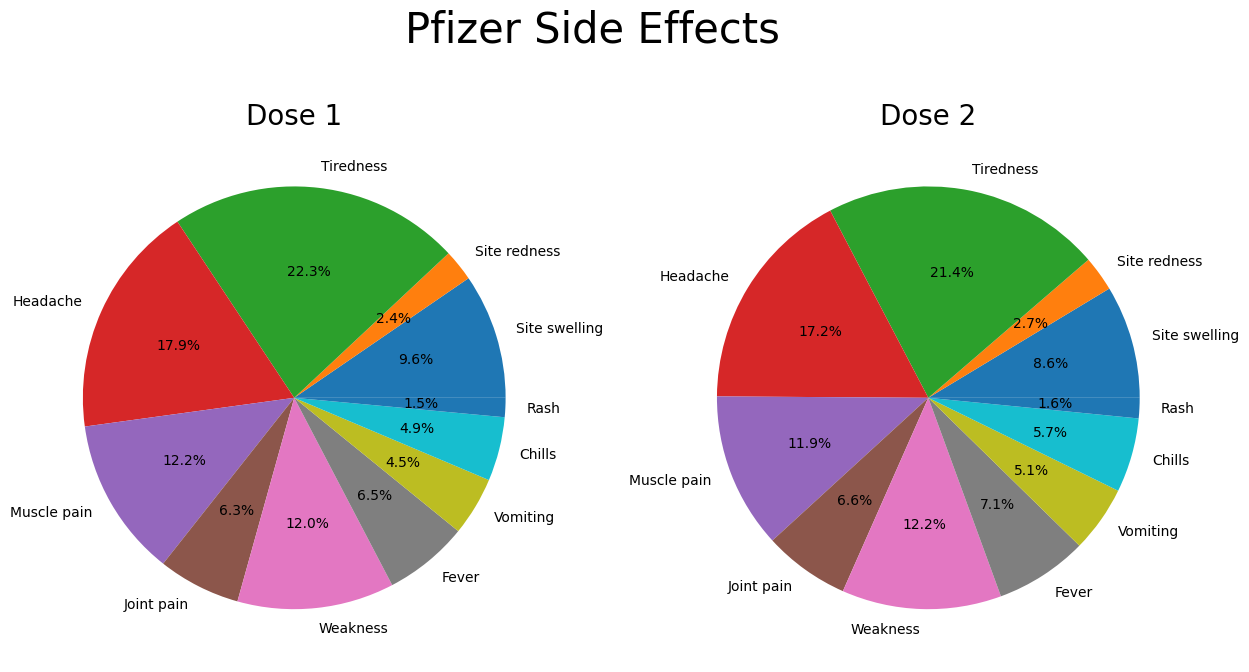

In [152]:
## Pfizer SE comparison between dose
fig2, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8)) #ax1,ax2 refer to your two pies

labels = ['Site swelling', 'Site redness', 'Tiredness', 'Headache',
                     'Muscle pain' , 'Joint pain', 'Weakness', 'Fever', 
                     'Vomiting', 'Chills', 'Rash']
values = D1_SE.loc['pfizer']
ax1.pie(values,labels = labels, autopct = '%1.1f%%') #plot first pie
ax1.set_title('Dose 1', fontsize=20)


labels = ['Site swelling', 'Site redness', 'Tiredness', 'Headache',
                     'Muscle pain' , 'Joint pain', 'Weakness', 'Fever', 
                     'Vomiting', 'Chills', 'Rash']
values = D2_SE.loc['pfizer']
ax2.pie(values,labels = labels, autopct = '%1.1f%%') #plot first pie
ax2.set_title('Dose 2' , fontsize=20)

fig2.suptitle('Pfizer Side Effects', fontsize=30)


Text(0.5, 0.98, 'Sinovac Side Effects')

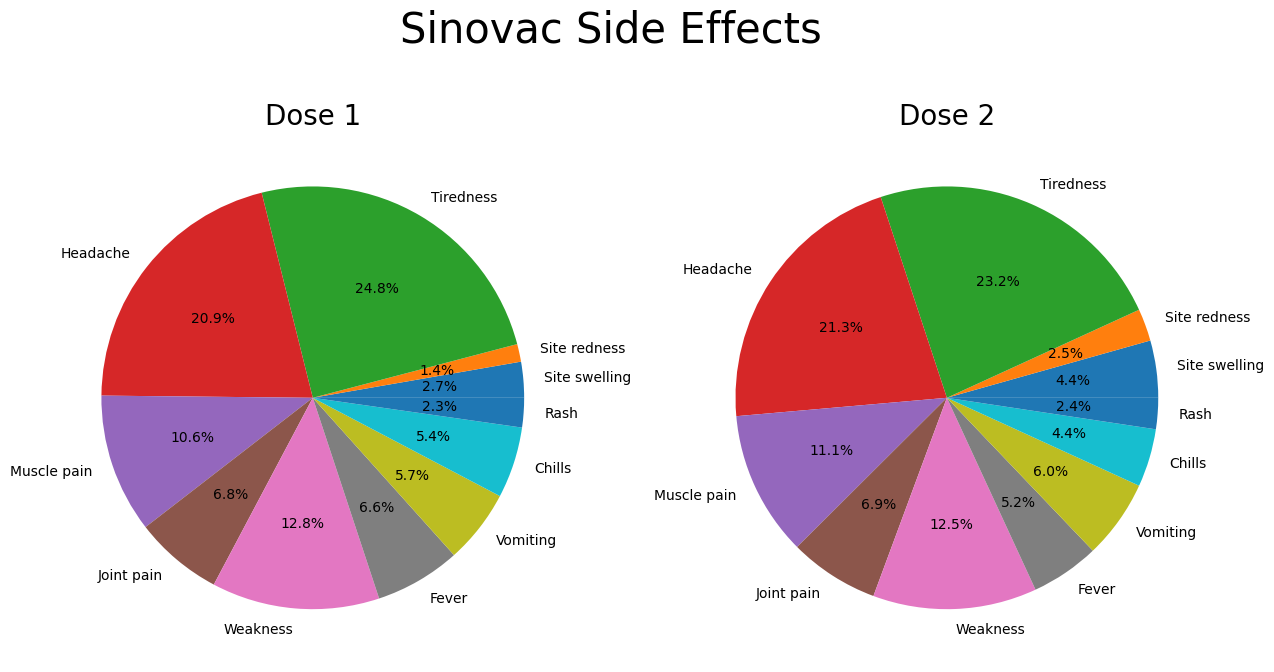

In [153]:
## Sinovac SE comparison between dose
fig3, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8)) #ax1,ax2 refer to your two pies

labels = ['Site swelling', 'Site redness', 'Tiredness', 'Headache',
                     'Muscle pain' , 'Joint pain', 'Weakness', 'Fever', 
                     'Vomiting', 'Chills', 'Rash']
values = D1_SE.loc['sinovac']
ax1.pie(values,labels = labels, autopct = '%1.1f%%') #plot first pie
ax1.set_title('Dose 1', fontsize=20)


labels = ['Site swelling', 'Site redness', 'Tiredness', 'Headache',
                     'Muscle pain' , 'Joint pain', 'Weakness', 'Fever', 
                     'Vomiting', 'Chills', 'Rash']
values = D2_SE.loc['sinovac']
ax2.pie(values,labels = labels, autopct = '%1.1f%%') #plot first pie
ax2.set_title('Dose 2' , fontsize=20)

fig3.suptitle('Sinovac Side Effects', fontsize=30)